In [1]:
import dask.dataframe as dd
import string
import re
import string
import unicodedata
import pandas as pd
import io
from PIL import Image
import matplotlib.pyplot as plt
# import emoji

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
hist = np.load('laion2b_hist.npy')

yedges = np.load('laion2b_yedges.npy')
bin_size = 50
xedges = np.load('laion2b_xedges.npy')


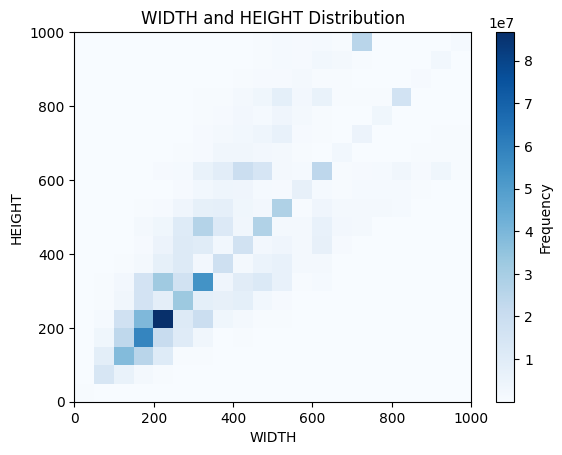

In [2]:
# plt.imshow(hist, origin='lower', aspect='auto', extent=[0, 2000, 0, 2000], cmap='Blues')
plt.imshow(hist[:20, :20], origin='lower', aspect='auto', extent=[0, 1000, 0, 1000], cmap='Blues')

plt.colorbar(label='Frequency')
plt.xlabel('WIDTH')
plt.ylabel('HEIGHT')
plt.title('WIDTH and HEIGHT Distribution')
plt.savefig('lain2b_Distribution.png')
plt.show()


In [6]:
total_data = np.sum(hist)
total_data

1326256966.0

In [16]:
ratios = np.arange(yedges[0], yedges[-1], bin_size) / np.arange(xedges[0], xedges[-1], bin_size)[:, None]
ratio_freqs = np.zeros_like(ratios)
for i in range(hist.shape[0]):
    for j in range(hist.shape[1]):
        ratio_freqs[i, j] = hist[i, j]


k = 10
top_k_indices = np.unravel_index(np.argpartition(ratio_freqs.flatten(), -k)[-k:], ratio_freqs.shape)
top_k_widths = top_k_indices[0] * bin_size
top_k_heights = top_k_indices[1] * bin_size
top_k_ratios = ratios[top_k_indices]
print(f'Top {k} ratios are at:')
for i in range(k):
    print(f'Width = {top_k_widths[i]}, Height = {top_k_heights[i]}, Ratio = {top_k_ratios[i]}')

Top 10 ratios are at:
Width = 450, Height = 300, Ratio = 0.6666666666666666
Width = 450, Height = 450, Ratio = 1.0
Width = 500, Height = 500, Ratio = 1.0
Width = 300, Height = 200, Ratio = 0.6666666666666666
Width = 250, Height = 250, Ratio = 1.0
Width = 300, Height = 300, Ratio = 1.0
Width = 150, Height = 150, Ratio = 1.0
Width = 200, Height = 200, Ratio = 1.0
Width = 100, Height = 100, Ratio = 1.0
Width = 200, Height = 150, Ratio = 0.75


/tmp/ipykernel_666268/2947688012.py:1: RuntimeWarning: divide by zero encountered in true_divide
  ratios = np.arange(yedges[0], yedges[-1], bin_size) / np.arange(xedges[0], xedges[-1], bin_size)[:, None]
/tmp/ipykernel_666268/2947688012.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratios = np.arange(yedges[0], yedges[-1], bin_size) / np.arange(xedges[0], xedges[-1], bin_size)[:, None]


In [126]:
#  ®: Registered Trademark. 这个符号表示该商标已经注册并受到法律保护。
#  ™: Trademark. 这个符号表示该商标正在被使用作为一个商标，但可能尚未注册或受到法律保护。 --> ^(TM)
#  ©: Copyright. 这个符号表示该作品（通常是艺术、音乐、文学作品等）的版权受到法律保护。
# £ 英镑 €欧元 ---> ¤: 通常用于表示未指定的货币。
# """" --> " 转义
# ½ ----> 1/2 分数
# ♥


38                                                                                                                              Shoes Shoe Casual Clothing Human Body Part Standing One Person Lifestyles People Human Leg Close-up Day Child Childhood Dirt Honduras ♥
110                                                                                                                                                                           Winter forest seamless pattern. Christmas trees and snow backgro Stock photo © popaukropa
369                                                                                                                                                                                                        GE® Stainless Steel Interior Dishwasher with Hidden Controls
659                                                                                                                                                                                                           "G

In [ ]:


# df = pd.read_parquet('your_file.parquet')
def show_image(buffer):
    img = Image.open(io.BytesIO(buffer))
    plt.imshow(img)
    plt.show()

result.head(10)['BUFFER'].apply(show_image)
